In [1]:
# importing  important libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# importing dataset
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# dropping unimportant columns
df = df.drop(['instant','dteday','registered','casual'],axis=1)

In [8]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
# Making categorical columns from value given in data sheet
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df['weathersit'].replace({1:"Clear_FewClouds_PartlyCloudy",2:"MistCloudy",3:"LightRain",4:'HeavyRain'},inplace=True)
df['weekday'].replace({0:"Tuesday",1:"Wednesday",2:"Thursday",3:"Friday",4:"Saturday",5:"Sunday",6:"Monday"},inplace=True)
df['mnth'].replace({1:"January",2:"February",3:"MArch",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"},inplace=True)

In [10]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,0,MistCloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,0,MistCloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear_FewClouds_PartlyCloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear_FewClouds_PartlyCloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear_FewClouds_PartlyCloudy,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


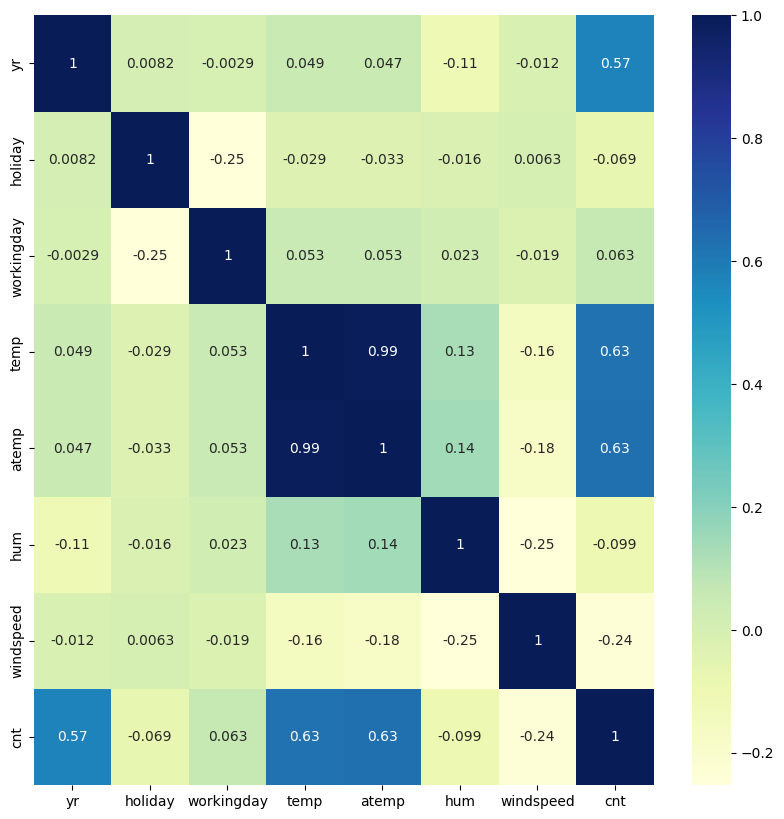

In [12]:
# pltting heatmap berween variables to see the correlation
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

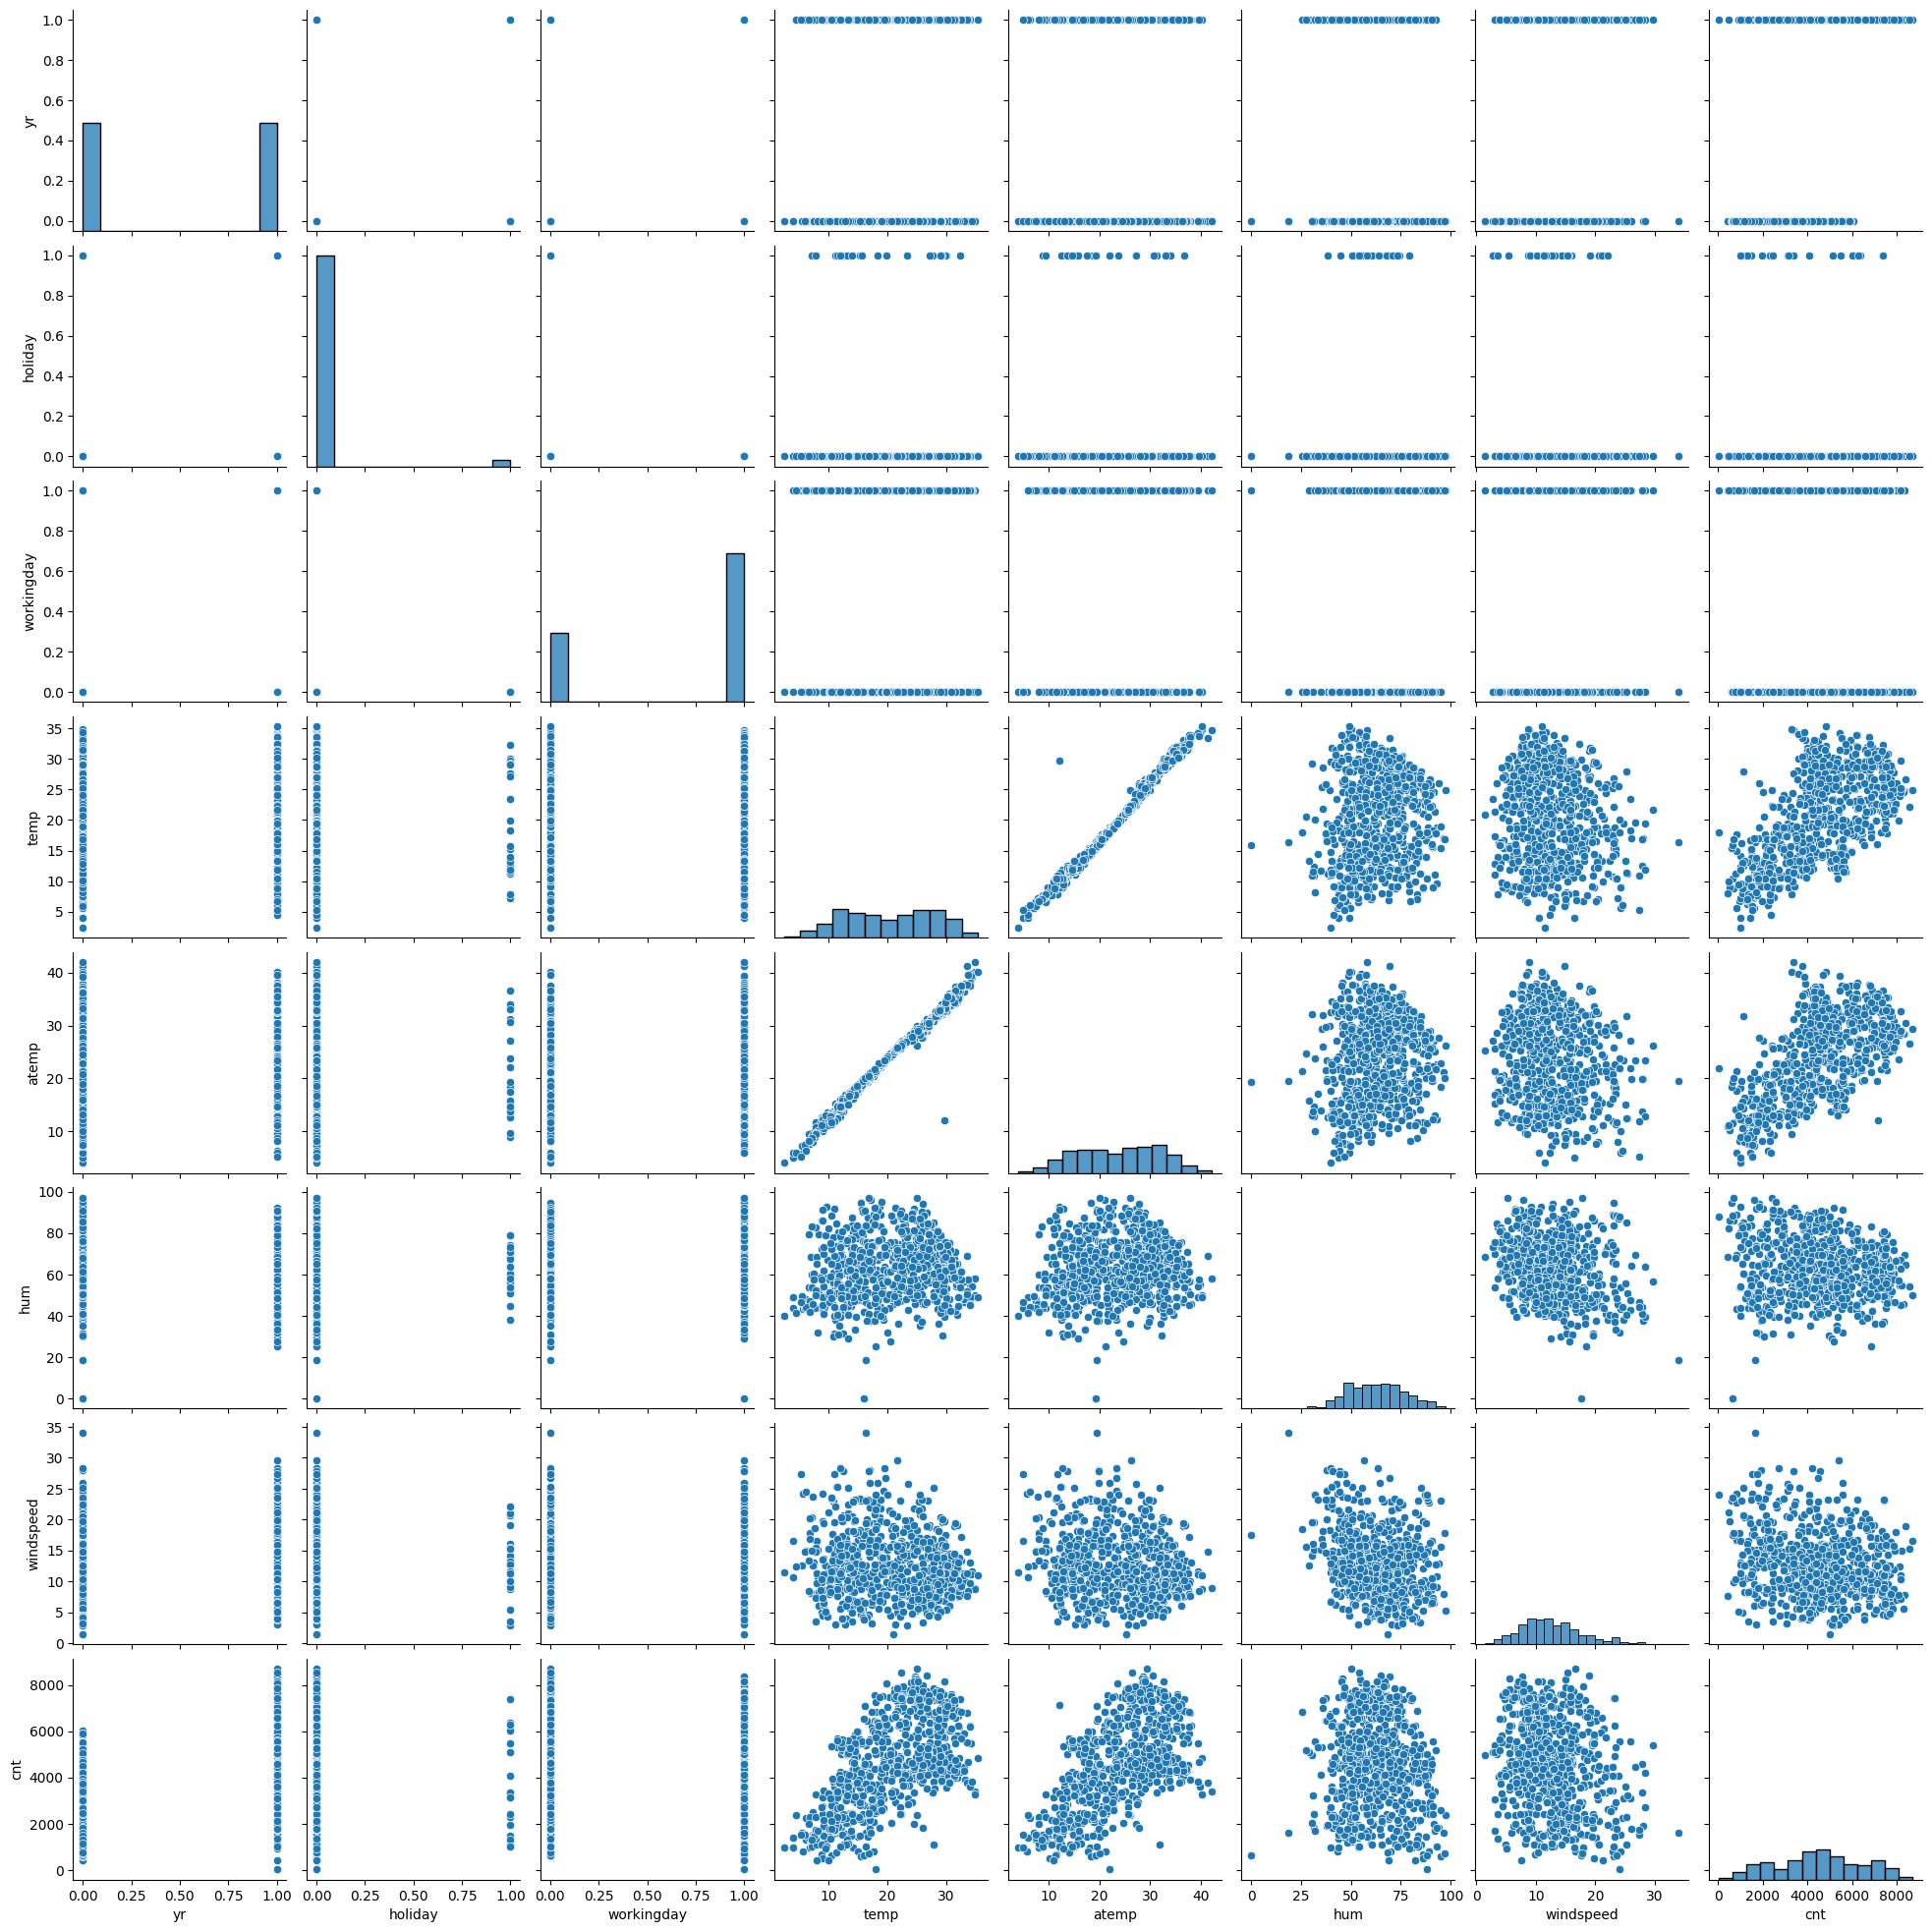

In [13]:
# numerical variables visualizations
sns.pairplot(df)
plt.show()

In [14]:
#correlation between temp and atemp is ~1. Hence better to drop it.
df.drop(['temp'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,0,MistCloudy,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,0,MistCloudy,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear_FewClouds_PartlyCloudy,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear_FewClouds_PartlyCloudy,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear_FewClouds_PartlyCloudy,11.46350,43.6957,12.522300,1600


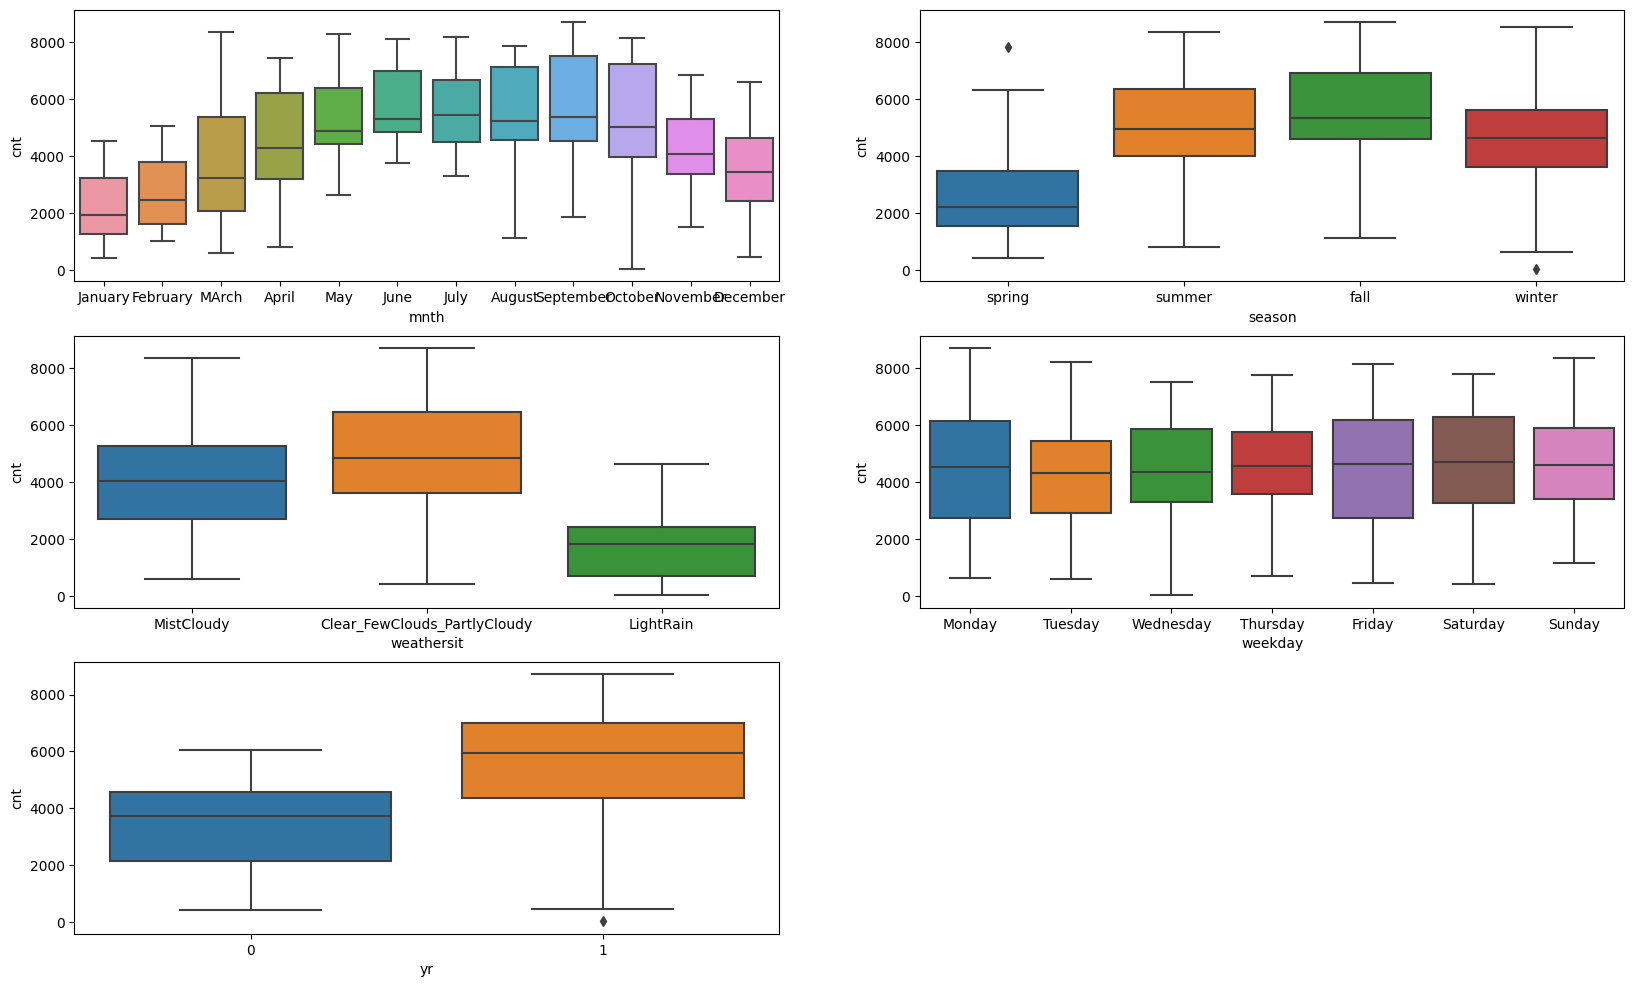

In [15]:
# caegorical variables visualizations
plt.figure(figsize=(20, 12))
plt.subplot(3,2,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)

plt.subplot(3,2,2)
sns.boxplot(data = df, x = 'season', y = 'cnt', )

plt.subplot(3,2,3)
sns.boxplot(data = df, x = 'weathersit', y = 'cnt')

plt.subplot(3,2,4)
sns.boxplot(data = df, x = 'weekday', y = 'cnt')

plt.subplot(3,2,5)
sns.boxplot(data = df, x = 'yr', y = 'cnt')
plt.show()

In [16]:
# Creating dummy variables from categorical data

season1=pd.get_dummies(df['season'],drop_first=True)
weathersit1=pd.get_dummies(df['weathersit'],drop_first=True)
weekday1=pd.get_dummies(df['weekday'],drop_first=True)
mnth1=pd.get_dummies(df['mnth'],drop_first=True)

In [17]:
# Adding dummy variable to dataframe
df=pd.concat([df,season1],axis=1)
df=pd.concat([df,weathersit1],axis=1)
df=pd.concat([df,weekday1],axis=1)
df=pd.concat([df,mnth1],axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
 11  spring      730 non-null    uint8  
 12  summer      730 non-null    uint8  
 13  winter      730 non-null    uint8  
 14  LightRain   730 non-null    uint8  
 15  MistCloudy  730 non-null    uint8  
 16  Monday      730 non-null    uint8  
 17  Saturday    730 non-null    uint8  
 18  Sunday      730 non-null    uint8  
 19  Thursday    730 non-null    u

In [19]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,December,February,January,July,June,MArch,May,November,October,September
0,spring,0,January,0,Monday,0,MistCloudy,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,January,0,Tuesday,0,MistCloudy,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,January,0,Wednesday,1,Clear_FewClouds_PartlyCloudy,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,January,0,Thursday,1,Clear_FewClouds_PartlyCloudy,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,January,0,Friday,1,Clear_FewClouds_PartlyCloudy,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [20]:
# Deleting original categorical variables
df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)
df.drop(['weekday'],axis=1,inplace=True)
df.drop(['mnth'],axis=1,inplace=True)

df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,December,February,January,July,June,MArch,May,November,October,September
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [21]:
df.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'LightRain', 'MistCloudy', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'August',
       'December', 'February', 'January', 'July', 'June', 'MArch', 'May',
       'November', 'October', 'September'],
      dtype='object')

In [22]:
# Splitting dataset into train and test 70-30 ratio
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [23]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,December,February,January,July,June,MArch,May,November,October,September
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


In [25]:
# Scaling numerical variables
scaler=MinMaxScaler()
num_vars=['atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [26]:
# Creating X and Y
y_train = df_train.pop('cnt')
X_train = df_train

In [27]:
# Using automatic RFE technique to remove least important variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [28]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('LightRain', True, 1),
 ('MistCloudy', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 12),
 ('Sunday', False, 8),
 ('Thursday', False, 11),
 ('Tuesday', True, 1),
 ('Wednesday', False, 13),
 ('August', False, 7),
 ('December', False, 2),
 ('February', False, 4),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 9),
 ('MArch', False, 14),
 ('May', False, 5),
 ('November', False, 3),
 ('October', False, 10),
 ('September', True, 1)]

In [29]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'LightRain', 'MistCloudy', 'Monday', 'Tuesday', 'January',
       'July', 'September'],
      dtype='object')

In [30]:
X_train.columns[~rfe.support_]

Index(['summer', 'Saturday', 'Sunday', 'Thursday', 'Wednesday', 'August',
       'December', 'February', 'June', 'MArch', 'May', 'November', 'October'],
      dtype='object')

### Building model using Statmodel library

In [31]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [32]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [33]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [34]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.66e-188
Time:                        18:18:44   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2535      0.026      9.914      0.000       0.203       0.304
yr             0.2325      0.008     28.590      0.000       0.217       0.248
holiday       -0.0025      0.021     -0.117      0.907      -0.045       0.040
workingday     0.0966      0.009     10.325      0.000       0.078       0.115
atemp          0.4761      0.033     14.319      0.000       0.411       0.541
hum           -0.1449      0.038     -3.824      0.000      -0.219      -0.070
windspeed     -0.1615      0.026     -6.254      0.000      -0.212      -0.111
spring        -0.1043      0.015     -6.858      0.000      -0.134      -0.074
winter         0.0458      0.012      3.749      0.000       0.022       0.070
LightRain     -0.2484      0.027     -9.373      0.000      -0.300      -0.196
MistCloudy    -0.0594      0.011     -5.624      0.000      -0.080      -0.039
Monday         0.1066      0.011      9.287      0.000       0.084       0.129
Tuesday        0.0529      0.012      4.385      0.000       0.029       0.077
January       -0.0398      0.018     -2.264      0.024      -0.074      -0.005
July          -0.0699      0.017     -4.083      0.000      -0.104      -0.036
September      0.0626      0.015      4.045      0.000       0.032       0.093
==============================================================================
Omnibus:                       62.546   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.716
Skew:                          -0.605   Prob(JB):                     2.31e-37
Kurtosis:                       5.544   Cond. No.                     8.69e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.95e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [35]:
# Since holiday has high value of probability. So better to drop it
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

### Re-building the model

In [36]:
X_train_lm = sm.add_constant(X_train_new)

In [37]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [38]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.66e-188
Time:                        18:18:44   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2510      0.040      6.252      0.000       0.172       0.330
yr             0.2325      0.008     28.590      0.000       0.217       0.248
workingday     0.0991      0.026      3.848      0.000       0.048       0.150
atemp          0.4761      0.033     14.319      0.000       0.411       0.541
hum           -0.1449      0.038     -3.824      0.000      -0.219      -0.070
windspeed     -0.1615      0.026     -6.254      0.000      -0.212      -0.111
spring        -0.1043      0.015     -6.858      0.000      -0.134      -0.074
winter         0.0458      0.012      3.749      0.000       0.022       0.070
LightRain     -0.2484      0.027     -9.373      0.000      -0.300      -0.196
MistCloudy    -0.0594      0.011     -5.624      0.000      -0.080      -0.039
Monday         0.1091      0.027      4.010      0.000       0.056       0.163
Tuesday        0.0554      0.027      2.024      0.043       0.002       0.109
January       -0.0398      0.018     -2.264      0.024      -0.074      -0.005
July          -0.0699      0.017     -4.083      0.000      -0.104      -0.036
September      0.0626      0.015      4.045      0.000       0.032       0.093
==============================================================================
Omnibus:                       62.546   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.716
Skew:                          -0.605   Prob(JB):                     2.31e-37
Kurtosis:                       5.544   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# checking vif value
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,100.81
2,workingday,9.07
10,Monday,6.06
11,Tuesday,5.74
3,atemp,3.11
6,spring,2.66
4,hum,1.91
7,winter,1.75
9,MistCloudy,1.57
12,January,1.56


In [40]:
# Since vif of sunday is greater than 5 and p value also high. SO better to drop it.

In [41]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

### Re-building the model

In [42]:
X_train_lm = sm.add_constant(X_train_new)

In [43]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [44]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.5
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.65e-186
Time:                        18:18:45   Log-Likelihood:                 502.80
No. Observations:                 510   AIC:                            -977.6
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3474      0.032     10.921      0.000       0.285       0.410
yr             0.2329      0.008     28.257      0.000       0.217       0.249
atemp          0.4781      0.034     14.185      0.000       0.412       0.544
hum           -0.1460      0.038     -3.802      0.000      -0.222      -0.071
windspeed     -0.1638      0.026     -6.256      0.000      -0.215      -0.112
spring        -0.1066      0.015     -6.920      0.000      -0.137      -0.076
winter         0.0429      0.012      3.471      0.001       0.019       0.067
LightRain     -0.2436      0.027     -9.076      0.000      -0.296      -0.191
MistCloudy    -0.0573      0.011     -5.362      0.000      -0.078      -0.036
Monday         0.0138      0.011      1.209      0.227      -0.009       0.036
Tuesday       -0.0398      0.012     -3.364      0.001      -0.063      -0.017
January       -0.0405      0.018     -2.272      0.024      -0.076      -0.005
July          -0.0695      0.017     -4.002      0.000      -0.104      -0.035
September      0.0589      0.016      3.763      0.000       0.028       0.090
==============================================================================
Omnibus:                       78.611   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.868
Skew:                          -0.731   Prob(JB):                     7.37e-51
Kurtosis:                       5.954   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# checking vif value
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,61.57
2,atemp,3.11
5,spring,2.66
3,hum,1.91
6,winter,1.74
8,MistCloudy,1.57
11,January,1.56
12,July,1.30
7,LightRain,1.25
4,windspeed,1.20


### Residual Analysis of the train data

In [46]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

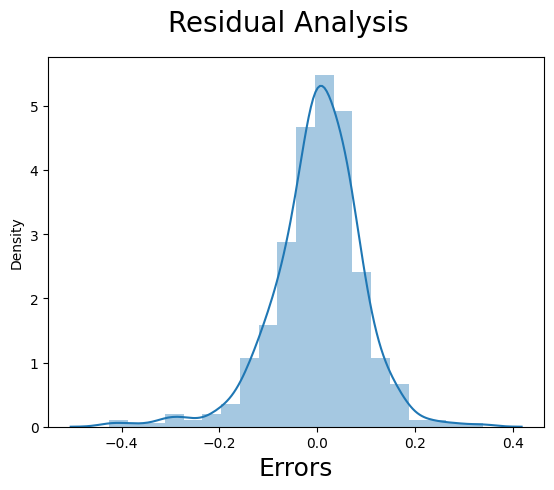

In [47]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Residual Analysis', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

### Making Predictions

In [48]:
# Scaling test dataset
num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [49]:
# Splitting into X_test ang y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [50]:
X_train_new=X_train_new.drop(['const'], axis=1)

In [51]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [52]:
# Making predictions
y_pred = lm.predict(X_test_new)
print(y_pred.head())

184    0.478688
535    0.868837
299    0.393073
221    0.608146
152    0.567927
dtype: float64


### Model evaluation

Text(0, 0.5, 'y_pred')

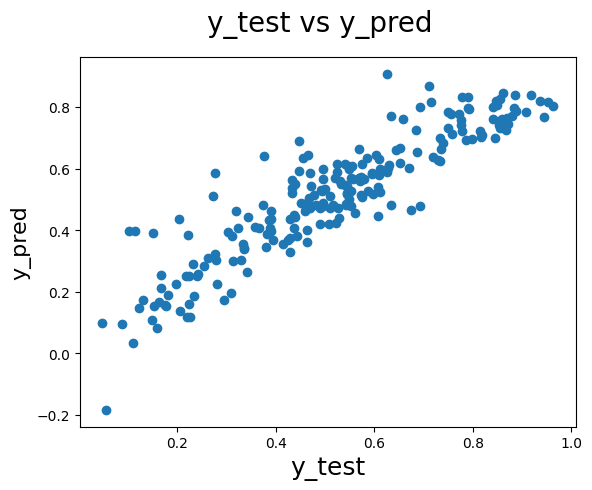

In [53]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [54]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8185007079258413